In [1]:
import sys
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
from dlstools.dataloader import *
from dlstools import *
from matplotlib.pyplot import *
from dlstools.quickfit import *
from dlstools.dirty_fit import fit
%matplotlib inline


=== Importing dlstools package


/dls_sw/apps/scisoftpy/2.7/scisoftpy/_external/tifffile.py:284: UserWarning: ImportError: No module named '_tifffile'. Loading of some compressed images will be very slow. Tifffile.c can be obtained at http://www.lfd.uci.edu/~gohlke/
  "ImportError: No module named '_tifffile'. "
Could not import plotting routines
No module named py4j.java_gateway


=== Need to obtain specfilewrapper.py and compatible specfile.so from ERSF PyMCA package in order to load spec files


In [2]:
p='/dls/i16/data/2018/mt19890-1/%i.nxs'
n=pdnx(p % 709993)

/dls_sw/i16/software/python/dlstools/dataloader.py:44: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  setattr(self,'nx',_nx)


In [3]:
n

,TimeSec,count_time,delta_axis_offset,ic1monitor,kap,kdelta,kgam,kmu,kphi,kth,maxval,maxx,maxy,path,rc,sum,sz
0,80353.347533,1.0,8.8,113.049822,-133.111303,128.298723,0.0,0.0,145.98665,120.84892,55.0,477.0,35.0,1.0,300.111847,2362446.0,2.92644
1,80357.080736,1.0,8.8,113.063560,-133.111303,128.298723,0.0,0.0,145.98665,120.84892,53.0,445.0,20.0,2.0,300.077789,2361447.0,2.93644
2,80360.307213,1.0,8.8,113.054097,-133.111303,128.298723,0.0,0.0,145.98665,120.84892,52.0,340.0,163.0,3.0,300.051239,2369548.0,2.94644
3,80363.536235,1.0,8.8,113.031811,-133.111303,128.298723,0.0,0.0,145.98665,120.84892,51.0,87.0,67.0,4.0,300.020660,2362702.0,2.95644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,80441.804589,1.0,8.8,112.785138,-133.111303,128.298723,0.0,0.0,145.98665,120.84892,116.0,244.0,96.0,28.0,299.337616,2191894.0,3.19644
28,80445.034924,1.0,8.8,112.766210,-133.111303,128.298723,0.0,0.0,145.98665,120.84892,109.0,244.0,96.0,29.0,299.309662,2192312.0,3.20644
29,80448.265404,1.0,8.8,112.762242,-133.111303,128.298723,0.0,0.0,145.98665,120.84892,90.0,244.0,96.0,30.0,299.281494,2195124.0,3.21644
30,80451.499235,1.0,8.8,112.755830,-133.111303,128.298723,0.0,0.0,145.98665,120.84892,68.0,244.0,96.0,31.0,299.252960,2198268.0,3.22644


print n.nx.tree

# test.h5 has scandata fields of shape 20, 666 and 20x1024
what to do with these?
scalars - pad out
multi-dim - ??? .... return field value of remaining dimensions? e.g. image for each point?

In [4]:
n1=pdnx('/home/spc93/data/test.h5', scandata_field='/entry154/measurement')

=== Failed to create DataFrame from data - create empty DataFrame


In [10]:
#look at shapes...
for key in n1.nx.entry154.measurement.keys():
    print key, n1.nx.entry154.measurement[key].shape

mot09 ()
ct12 (20,)
oned03 (20, 1024)
ct10 (20,)
ct11 (20,)
mot12 ()
mot10 (20,)
mot11 ()
Pt_No (20,)
detector (20,)
dt (20,)
pre_scan_snapshot

NeXusError: 'shape' not in /entry154/measurement/pre_scan_snapshot

In [14]:
n1.nx.entry154.measurement.oned03.dir

<bound method NXfield.dir of NXfield(array([[  2.98023224e-09,   3.18894876e-09,   3.41183047e-09, ...,
          3.41183047e-09,   3.18894876e-09,   2.98023224e-09],
       [  2.98023224e-09,   3.18894876e-09,   3.41183047e-09, ...,
          3.41183047e-09,   3.18894876e-09,   2.98023224e-09],
       [  2.98023224e-09,   3.18894876e-09,   3.41183047e-09, ...,
          3.41183047e-09,   3.18894876e-09,   2.98023224e-09],
       ..., 
       [  2.98023224e-09,   3.18894876e-09,   3.41183047e-09, ...,
          3.41183047e-09,   3.18894876e-09,   2.98023224e-09],
       [  2.98023224e-09,   3.18894876e-09,   3.41183047e-09, ...,
          3.41183047e-09,   3.18894876e-09,   2.98023224e-09],
       [  2.98023224e-09,   3.18894876e-09,   3.41183047e-09, ...,
          3.41183047e-09,   3.18894876e-09,   2.98023224e-09]]))>

In [ ]:
print n1.nx.tree

In [ ]:
n1.nx.entry154.measurement.ct11.attrs
n1.nx.keys()
n1.nx.attrs

In [ ]:
n1.nx.entry154.measurement.keys()

In [ ]:
find_key(n1.nx, 'measurement')

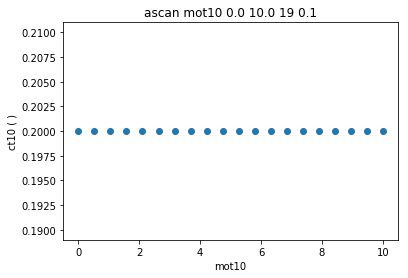

In [17]:
n1.nx.plot()

In [ ]:
n2=pdnx('/home/spc93/data/xanes_new_py3.h5')

In [ ]:
print n2.nx.tree

In [ ]:
n2.nx.plot()